**REGRESIÓN LINEAL SIMPLE Y MÚLTIPLE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo 
mex= pd.read_csv("Mexico_Datos_Limpios_2.csv")
print(mex)

       Unnamed: 0.1  Unnamed: 0 last_scraped         host_name  host_since  \
0                 0           0   27/12/2024              Dici  28/06/2010   
1                 1           1   28/12/2024          Fernando  09/08/2010   
2                 2           2   28/12/2024          Nicholas  04/01/2011   
3                 3           3   27/12/2024            Trisha  24/08/2010   
4                 4           4   28/12/2024          Fernando  31/05/2011   
...             ...         ...          ...               ...         ...   
26276         26276       26276   28/12/2024          Grissell  26/09/2020   
26277         26277       26277   27/12/2024           Partner  13/07/2023   
26278         26278       26278   27/12/2024  Bellanira Isabel  10/09/2019   
26279         26279       26279   28/12/2024              Juan  07/06/2015   
26280         26280       26280   28/12/2024              Clau  02/02/2020   

             host_location  host_response_time host_response_ra

In [3]:
mex = mex.drop(columns=["Unnamed: 0"])

In [4]:
print(mex)

       Unnamed: 0.1 last_scraped         host_name  host_since  \
0                 0   27/12/2024              Dici  28/06/2010   
1                 1   28/12/2024          Fernando  09/08/2010   
2                 2   28/12/2024          Nicholas  04/01/2011   
3                 3   27/12/2024            Trisha  24/08/2010   
4                 4   28/12/2024          Fernando  31/05/2011   
...             ...          ...               ...         ...   
26276         26276   28/12/2024          Grissell  26/09/2020   
26277         26277   27/12/2024           Partner  13/07/2023   
26278         26278   27/12/2024  Bellanira Isabel  10/09/2019   
26279         26279   28/12/2024              Juan  07/06/2015   
26280         26280   28/12/2024              Clau  02/02/2020   

             host_location  host_response_time host_response_rate  \
0      Mexico City, Mexico                   0                  0   
1      Mexico City, Mexico      within an hour                92%   


In [5]:
mex = mex.drop(columns=["Unnamed: 0.1"])

In [6]:
print(mex)

      last_scraped         host_name  host_since        host_location  \
0       27/12/2024              Dici  28/06/2010  Mexico City, Mexico   
1       28/12/2024          Fernando  09/08/2010  Mexico City, Mexico   
2       28/12/2024          Nicholas  04/01/2011  Mexico City, Mexico   
3       27/12/2024            Trisha  24/08/2010  Mexico City, Mexico   
4       28/12/2024          Fernando  31/05/2011  Mexico City, Mexico   
...            ...               ...         ...                  ...   
26276   28/12/2024          Grissell  26/09/2020  Mexico City, Mexico   
26277   27/12/2024           Partner  13/07/2023    Monterrey, Mexico   
26278   27/12/2024  Bellanira Isabel  10/09/2019  Mexico City, Mexico   
26279   28/12/2024              Juan  07/06/2015                    0   
26280   28/12/2024              Clau  02/02/2020  Mexico City, Mexico   

       host_response_time host_response_rate host_acceptance_rate  \
0                       0                  0          

In [7]:
pais = pd.read_csv("País_Datos_Limpios.csv")
print(pais)

      Unnamed: 0 last_scraped                         host_name  host_since  \
0              0   18/09/2024                             Frank  03/12/2008   
1              1   18/09/2024                             Terry  19/02/2009   
2              2   18/09/2024                             Terry  19/02/2009   
3              3   18/09/2024                              Anne  22/07/2009   
4              4   18/09/2024                          Michelle  16/09/2009   
...          ...          ...                               ...         ...   
4288        4288   18/09/2024                              Aziz  07/11/2019   
4289        4289   18/09/2024                              Aziz  07/11/2019   
4290        4290   18/09/2024                              Aziz  07/11/2019   
4291        4291   18/09/2024                              Asha  25/01/2019   
4292        4292   18/09/2024  Boston Harbor WaterFront Rentals  07/02/2024   

                     host_location  host_response_t

In [8]:
pais = pais.drop(columns=["Unnamed: 0"])

In [9]:
print(pais)

     last_scraped                         host_name  host_since  \
0      18/09/2024                             Frank  03/12/2008   
1      18/09/2024                             Terry  19/02/2009   
2      18/09/2024                             Terry  19/02/2009   
3      18/09/2024                              Anne  22/07/2009   
4      18/09/2024                          Michelle  16/09/2009   
...           ...                               ...         ...   
4288   18/09/2024                              Aziz  07/11/2019   
4289   18/09/2024                              Aziz  07/11/2019   
4290   18/09/2024                              Aziz  07/11/2019   
4291   18/09/2024                              Asha  25/01/2019   
4292   18/09/2024  Boston Harbor WaterFront Rentals  07/02/2024   

                     host_location  host_response_time host_is_superhost  \
0     Massachusetts, United States        within a day                 t   
1                       Boston, MA      wit

In [10]:
from turtle import color

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [24]:
print(mex.columns)

Index(['last_scraped', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'property_type', 'room_type', 'bathrooms_text', 'price',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'instant_bookable', 'id', 'host_id',
       'host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_90', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_loca

**Regresión Lineal Simple**

In [25]:
mex.head(5)

,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_location,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 52,Unnamed: 53,Unnamed: 54,D�lar
0,27/12/2024,Dici,28/06/2010,"Mexico City, Mexico",0,0,0,0.0,t,1.0,...,4.90,0,1.0,0.0,0,0.00,NaN,NaN,NaN,$196.50
1,28/12/2024,Fernando,09/08/2010,"Mexico City, Mexico",within an hour,92%,92%,1.0,t,1.0,...,4.98,0,4.0,1.0,0,0.40,NaN,NaN,NaN,$874.64
2,28/12/2024,Nicholas,04/01/2011,"Mexico City, Mexico",within a few hours,100%,56%,1.0,t,1.0,...,4.98,0,2.0,0.0,0,0.31,NaN,NaN,NaN,$103.16
3,27/12/2024,Trisha,24/08/2010,"Mexico City, Mexico",within an hour,100%,94%,1.0,t,1.0,...,4.96,0,2.0,1.0,0,0.84,NaN,NaN,NaN,$60.06
4,28/12/2024,Fernando,31/05/2011,"Mexico City, Mexico",0,0,0,0.0,t,0.0,...,4.90,0,1.0,2.0,0,0.00,NaN,NaN,NaN,$0.00


In [26]:
mex['price'] = mex['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ghseb\AppData\Local\Temp\ipykernel_34632\4167236743.py:1: SyntaxWarning: invalid escape sequence '\$'
  mex['price'] = mex['price'].replace('[\$,]', '', regex=True).astype(float)


In [27]:
for col in ['host_is_superhost', 'host_identity_verified', 'instant_bookable']:
    if col in mex.columns and mex[col].dtype == 'object':
        mex[col] = mex[col].map({'t': 1, 'f': 0})

In [28]:
def simple_linear_regression(x, y):
    """
    Realiza regresión lineal simple y devuelve:
      - slope, intercept: coeficientes del modelo
      - corr: coeficiente de Pearson
      - r2: coeficiente de determinación
      - x, y, y_pred: arrays usados y predicción para graficar
    """
    # Elimina valores nulos
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask].reshape(-1, 1)
    y = y[mask]
    
    reg = LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)
    
    r2 = r2_score(y, y_pred)
    corr, _ = pearsonr(x.flatten(), y)
    
    slope = reg.coef_[0]
    intercept = reg.intercept_
    
    return slope, intercept, corr, r2, x, y, y_pred

def plot_regression(x, y, y_pred, xlabel, ylabel, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, color='blue', label='Datos')
    plt.plot(x, y_pred, color='red', label='Línea de regresión')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [29]:
if 'accommdates' in mex.columns and 'bathrooms' in mex.columns:
    slope, intercept, corr, r2, x, y, y_pred = simple_linear_regression(
        df['bathrooms'].values, mex['accommdates'].values
    )
    print("Regresión: accommdates vs bathrooms")
    print("Modelo: accommdates = {:.2f} * bathrooms + {:.2f}".format(slope, intercept))
    print("Coeficiente de Pearson: {:.2f}".format(corr))
    print("Coeficiente de determinación (R^2): {:.2f}".format(r2))
    plot_regression(x, y, y_pred, 'Bathrooms', 'Accommdates', 'accommdates vs bathrooms')

### Análisis para room_type: Entire home/apt
Modelo: price vs host_acceptance_rate: price = -2.75 * x + 2180.71
Coeficiente de Pearson: -0.01, R^2: 0.00


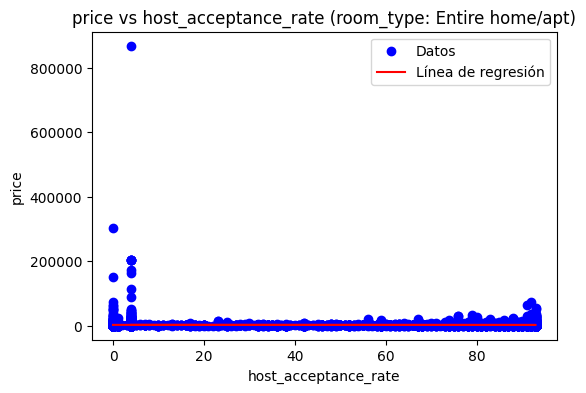

Modelo: price vs host_is_superhost: price = 726.43 * x + 1735.49
Coeficiente de Pearson: 0.04, R^2: 0.00


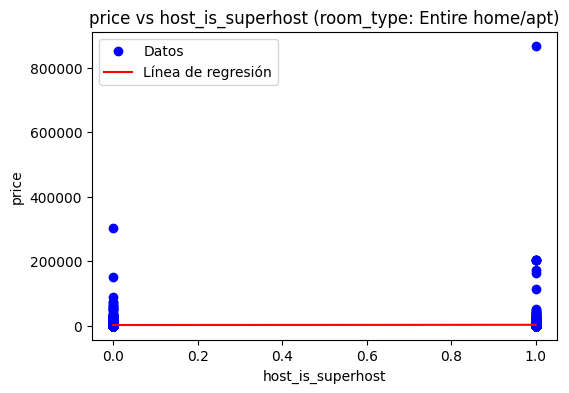

Modelo: price vs review_scores_cleanliness: price = 573.53 * x + -682.83
Coeficiente de Pearson: 0.01, R^2: 0.00


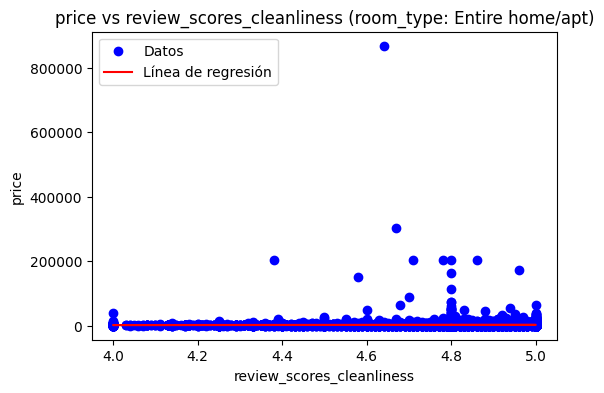

Modelo: price vs host_identity_verified: price = 257.15 * x + 1825.26
Coeficiente de Pearson: 0.01, R^2: 0.00


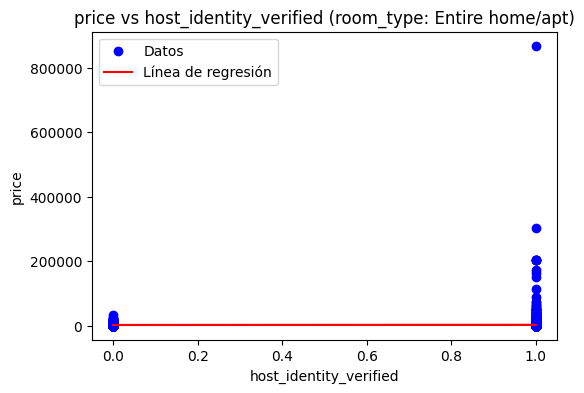

Modelo: price vs instant_bookable: price = 525.88 * x + 1853.83
Coeficiente de Pearson: 0.03, R^2: 0.00


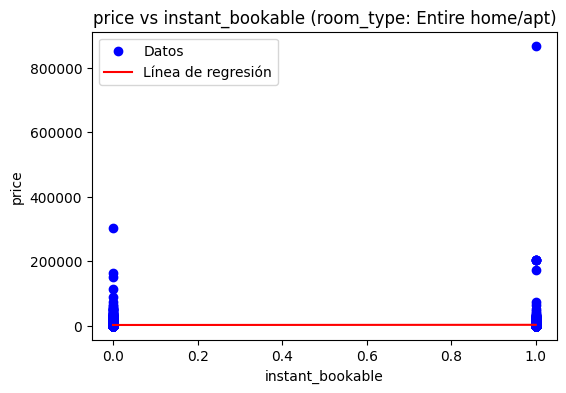

Modelo: price vs property_type: price = 5.67 * x + 1980.52
Coeficiente de Pearson: 0.00, R^2: 0.00


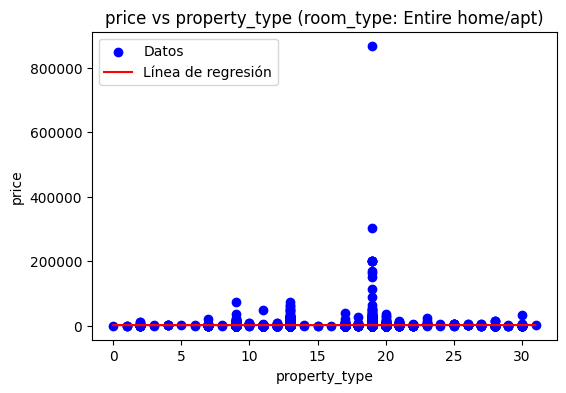

### Análisis para room_type: Private room
Modelo: price vs host_acceptance_rate: price = -2.26 * x + 891.04
Coeficiente de Pearson: -0.02, R^2: 0.00


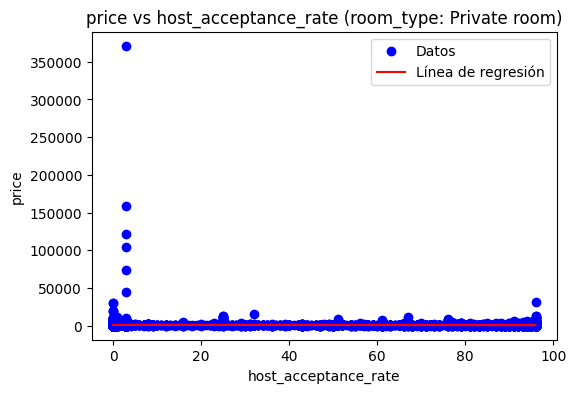

Modelo: price vs host_is_superhost: price = 15.37 * x + 804.74
Coeficiente de Pearson: 0.00, R^2: 0.00


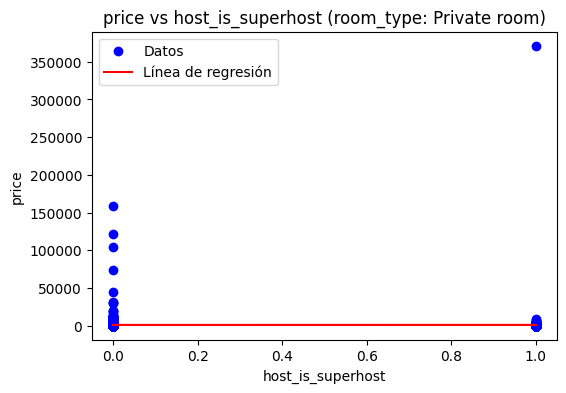

Modelo: price vs review_scores_cleanliness: price = 375.82 * x + -994.62
Coeficiente de Pearson: 0.02, R^2: 0.00


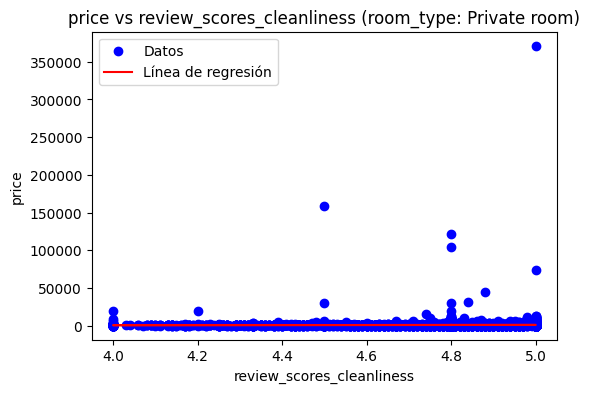

Modelo: price vs host_identity_verified: price = 725.25 * x + 131.39
Coeficiente de Pearson: 0.04, R^2: 0.00


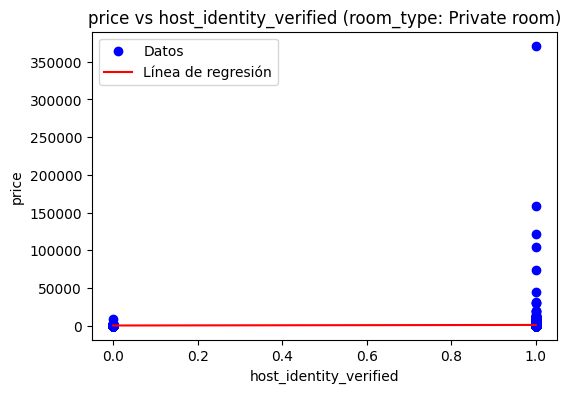

Modelo: price vs instant_bookable: price = 614.50 * x + 601.53
Coeficiente de Pearson: 0.06, R^2: 0.00


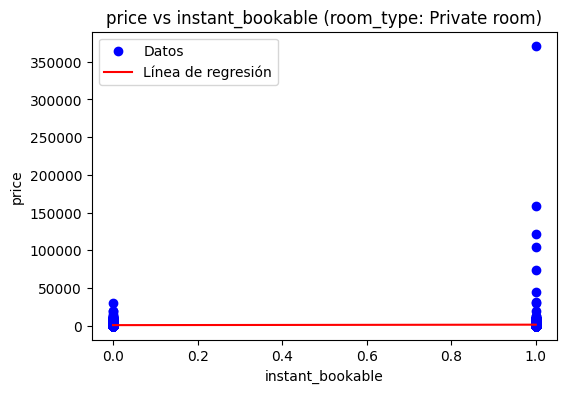

Modelo: price vs property_type: price = -1.35 * x + 829.96
Coeficiente de Pearson: -0.00, R^2: 0.00


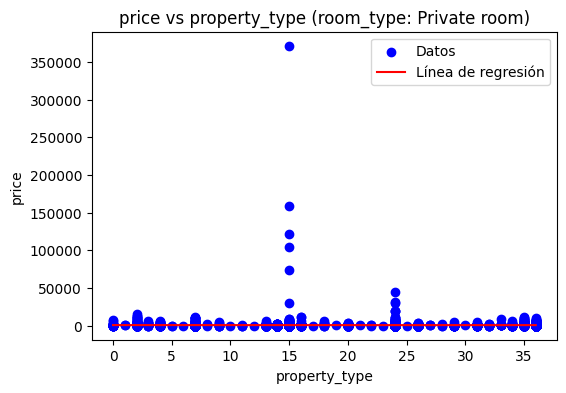

### Análisis para room_type: Hotel room
Modelo: price vs host_acceptance_rate: price = -105.52 * x + 2123.46
Coeficiente de Pearson: -0.18, R^2: 0.03


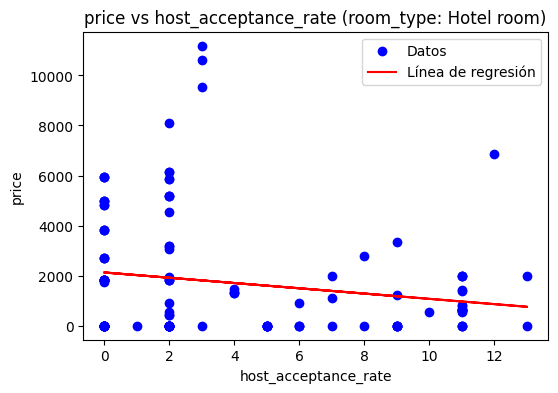

Modelo: price vs host_is_superhost: price = -625.05 * x + 1914.31
Coeficiente de Pearson: -0.11, R^2: 0.01


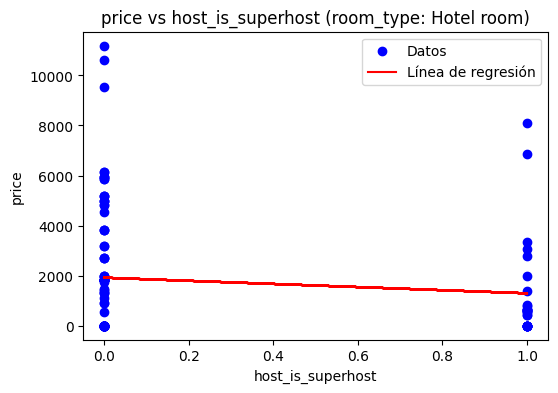

Modelo: price vs review_scores_cleanliness: price = 137.83 * x + 1054.36
Coeficiente de Pearson: 0.01, R^2: 0.00


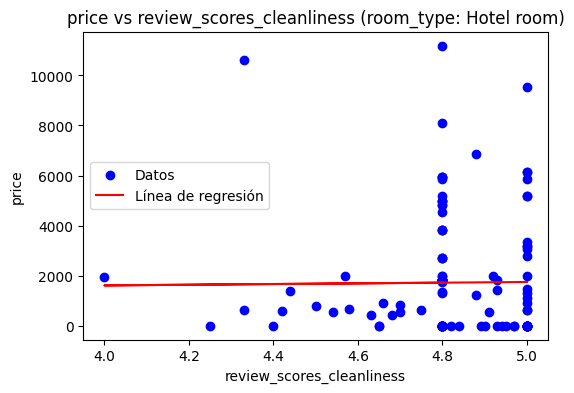

Modelo: price vs host_identity_verified: price = -673.38 * x + 2157.02
Coeficiente de Pearson: -0.14, R^2: 0.02


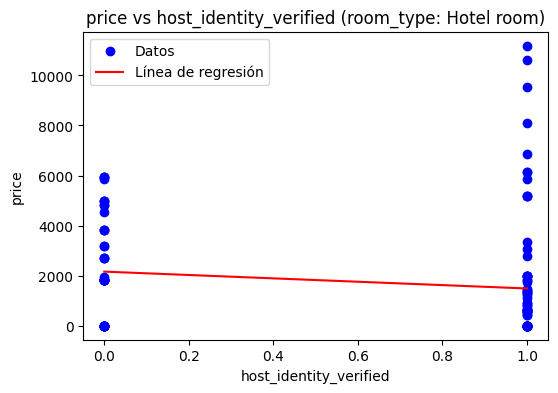

Modelo: price vs instant_bookable: price = 250.06 * x + 1507.25
Coeficiente de Pearson: 0.04, R^2: 0.00


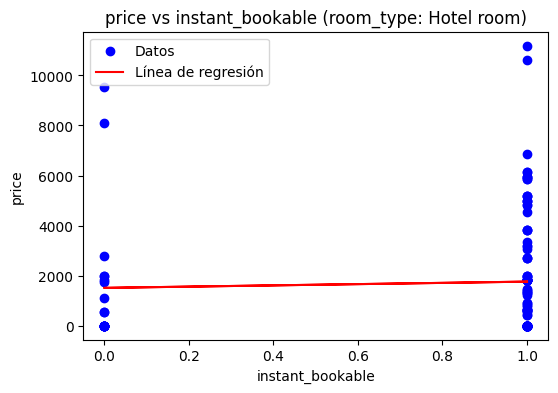

Modelo: price vs property_type: price = -105.30 * x + 2146.28
Coeficiente de Pearson: -0.08, R^2: 0.01


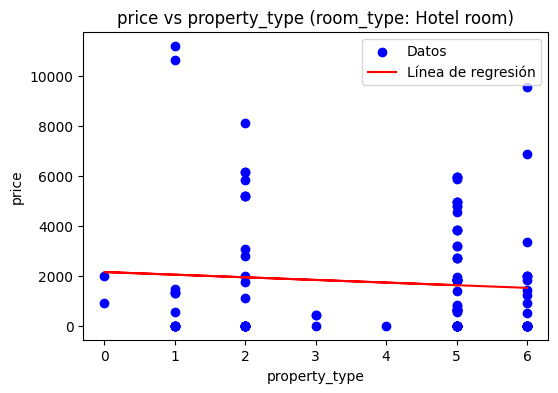

### Análisis para room_type: Shared room
Modelo: price vs host_acceptance_rate: price = -86.40 * x + 1788.30
Coeficiente de Pearson: -0.19, R^2: 0.03


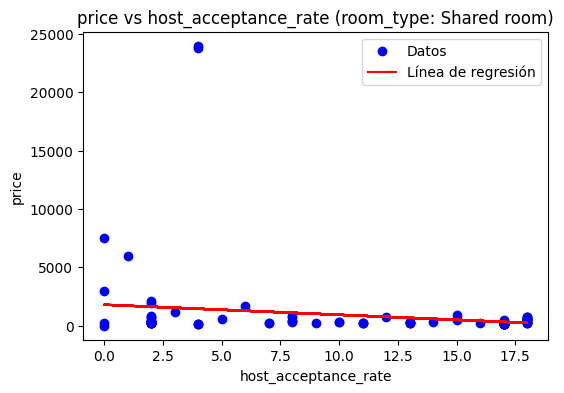

Modelo: price vs host_is_superhost: price = -812.83 * x + 1112.62
Coeficiente de Pearson: -0.10, R^2: 0.01


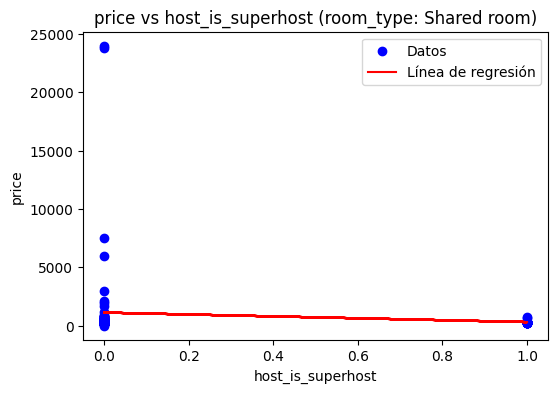

Modelo: price vs review_scores_cleanliness: price = 683.46 * x + -2336.33
Coeficiente de Pearson: 0.05, R^2: 0.00


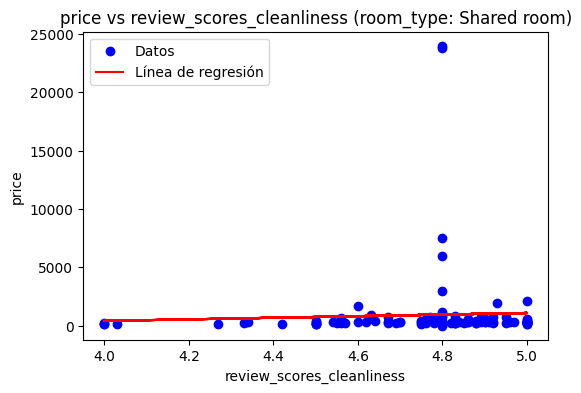

Modelo: price vs host_identity_verified: price = 695.58 * x + 292.09
Coeficiente de Pearson: 0.06, R^2: 0.00


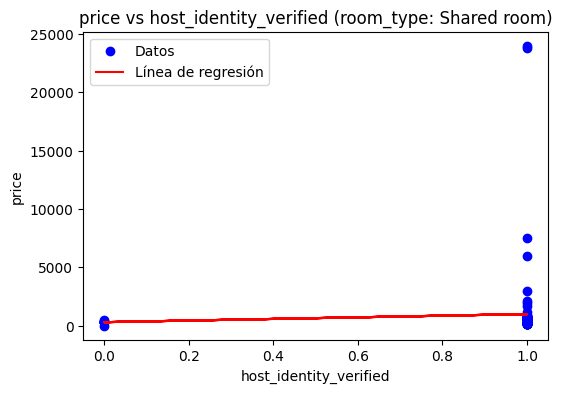

Modelo: price vs instant_bookable: price = -1251.57 * x + 1776.89
Coeficiente de Pearson: -0.18, R^2: 0.03


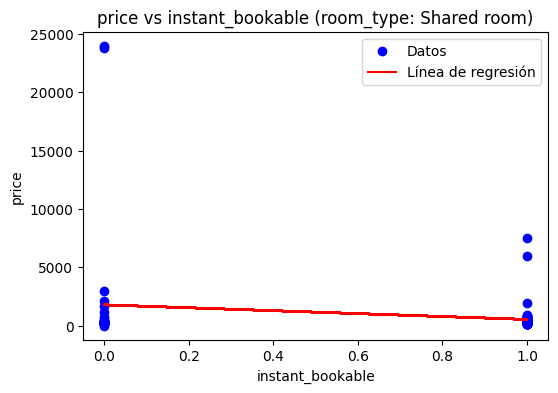

Modelo: price vs property_type: price = -243.73 * x + 2156.28
Coeficiente de Pearson: -0.20, R^2: 0.04


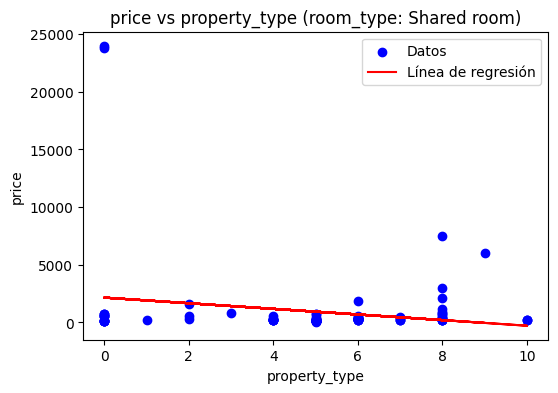

In [30]:
results = []  # Para almacenar resultados (coeficientes y métricas)
room_types = mex['room_type'].unique()

# Lista de variables independientes a analizar (para 'price')
independent_vars = ['host_acceptance_rate', 'host_is_superhost', 'review_scores_cleanliness', 
                      'host_identity_verified', 'instant_bookable', 'property_type']

for rt in room_types:
    df_rt = mex[mex['room_type'] == rt]
    print("### Análisis para room_type:", rt)
    best_corr = -np.inf
    best_model = None
    for var in independent_vars:
        # Verifica si la variable existe
        if var not in df_rt.columns:
            continue
        
        # Si la variable es categórica, se codifica (LabelEncoder)
        if df_rt[var].dtype == 'object':
            le = LabelEncoder()
            try:
                x_var = le.fit_transform(df_rt[var])
            except Exception as e:
                print("No se pudo codificar la variable:", var)
                continue
        else:
            x_var = df_rt[var].values
        
        # Variable dependiente: price
        if 'price' not in df_rt.columns:
            continue
        y_var = df_rt['price'].values
        
        # Convertir a float
        try:
            x_var = x_var.astype(float)
            y_var = y_var.astype(float)
        except:
            continue
        
        # Verifica que haya suficientes datos (más de un valor único)
        if np.unique(x_var).size < 2:
            continue
        
        # Regresión simple
        slope, intercept, corr, r2, x_used, y_used, y_pred = simple_linear_regression(x_var, y_var)
        print("Modelo: price vs {}: price = {:.2f} * x + {:.2f}".format(var, slope, intercept))
        print("Coeficiente de Pearson: {:.2f}, R^2: {:.2f}".format(corr, r2))
        plot_regression(x_used, y_used, y_pred, var, 'price', f'price vs {var} (room_type: {rt})')
        
        # Almacena resultados
        results.append({
            'room_type': rt, 
            'independent_var': var, 
            'slope': slope, 
            'intercept': intercept, 
            'pearson': corr, 
            'r2': r2
        })
        
        # Selecciona el modelo con mayor correlación (en valor absoluto)
        if abs(corr) > abs(best_corr):
            best_corr = corr
            best_model = {
                'room_type': rt, 
                'independent_var': var, 
                'slope': slope, 
                'intercept': intercept, 
                'pearson': corr, 
                'r2': r2
            }
    if best_model is not None:
        print(">> Mejor modelo para room_type {}: price vs {} con Pearson {:.2f}".format(
            rt, best_model['independent_var'], best_model['pearson']
        ))
        print("Ecuación: price = {:.2f} * {} + {:.2f}".format(
            best_model['slope'], best_model['independent_var'], best_model['intercept']
        ))
        print("\n" + "-"*50 + "\n")

In [31]:
results_df = pd.DataFrame(results)
print("Tabla de coeficientes de determinación y correlación para cada room_type:")
results_df

Tabla de coeficientes de determinación y correlación para cada room_type:


,room_type,independent_var,slope,intercept,pearson,r2
0,Entire home/apt,host_acceptance_rate,-2.754536,2180.707053,-0.013160,0.000173
1,Entire home/apt,host_is_superhost,726.426448,1735.485864,0.040771,0.001662
2,Entire home/apt,review_scores_cleanliness,573.532604,-682.832243,0.012406,0.000154
3,Entire home/apt,host_identity_verified,257.150279,1825.260647,0.005384,0.000029
4,Entire home/apt,instant_bookable,525.878334,1853.832279,0.030117,0.000907
5,Entire home/apt,property_type,5.670697,1980.521242,0.002840,0.000008
6,Private room,host_acceptance_rate,-2.263709,891.036332,-0.019103,0.000365
7,Private room,host_is_superhost,15.369554,804.737574,0.001410,0.000002
8,Private room,review_scores_cleanliness,375.823879,-994.623336,0.016349,0.000267
9,Private room,host_identity_verified,725.252146,131.386107,0.038143,0.001455


In [32]:
quant_vars = ['host_id', 'host_acceptance_rate', 'host_is_superhost', 
              'host_total_listings_count', 'room_type', 'accommodates', 
              'bedrooms', 'price', 'review_scores_value', 'reviews_per_month']

# Filtra las variables que existan en el dataframe
quant_vars = [var for var in quant_vars if var in mex.columns]

# Si 'room_type' es categórica, conviértela a numérica
for var in quant_vars:
    if mex[var].dtype == 'object':
        le = LabelEncoder()
        mex[var] = le.fit_transform(mex[var])

multi_results = {}

for dep in quant_vars:
    indep = [var for var in quant_vars if var != dep]
    # Selecciona filas sin NA en las columnas de interés
    X = mex[indep].dropna()
    y = mex[dep].loc[X.index]
    # Asegura conversión a numérico
    X = X.apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    X = X.dropna()
    y = y.loc[X.index]
    
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    multi_results[dep] = {
        'coefficients': dict(zip(indep, reg.coef_)),
        'intercept': reg.intercept_,
        'r2': r2
    }
    print("Modelo de regresión múltiple para '{}' como variable dependiente:".format(dep))
    print("  Intercept: {:.2f}".format(reg.intercept_))
    print("  Coeficientes:")
    for key, value in zip(indep, reg.coef_):
        print("    {}: {:.2f}".format(key, value))
    print("  R^2: {:.2f}".format(r2))
    print("\n" + "-"*40 + "\n")

Modelo de regresión múltiple para 'host_id' como variable dependiente:
  Intercept: 211136724.56
  Coeficientes:
    host_acceptance_rate: 18955.14
    host_is_superhost: -27418735.54
    host_total_listings_count: 320066.58
    room_type: 7244349.87
    accommodates: 2081115.78
    bedrooms: -1636113.50
    price: -240.32
    reviews_per_month: 8614647.12
  R^2: 0.01

----------------------------------------

Modelo de regresión múltiple para 'host_acceptance_rate' como variable dependiente:
  Intercept: 29.40
  Coeficientes:
    host_id: 0.00
    host_is_superhost: 8.60
    host_total_listings_count: 0.51
    room_type: 1.07
    accommodates: 0.10
    bedrooms: 1.77
    price: -0.00
    reviews_per_month: 0.43
  R^2: 0.02

----------------------------------------



ValueError: Input y contains NaN.

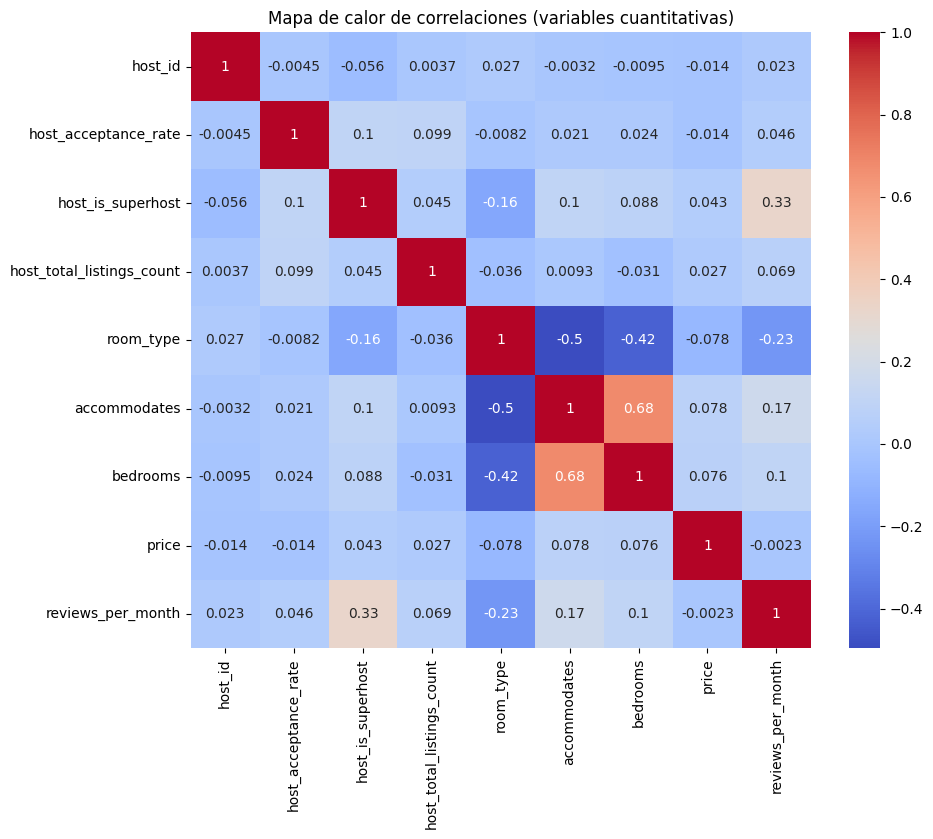

In [33]:
plt.figure(figsize=(10,8))
corr_matrix = mex[quant_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones (variables cuantitativas)")
plt.show()